In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import gmaps
import os


# Import API key
from api_keys import g_key


base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"



params = {"type" : "geometry",
             "keyword" : "geometry",
             "radius" : 5000,
             "key" : g_key }

In [2]:
# Access maps with unique API key
gmaps.configure(api_key=g_key)

In [8]:
ds_salaries_df = pd.read_csv("Resources/ds_salaries.csv")
del ds_salaries_df["Unnamed: 0"]

ds_renamed_df = ds_salaries_df.rename(columns={"work_year":"Work Year",
                                              "experience_level":"Experience Level",
                                              "employment_type":"Employment Type",
                                              "job_title":"Job Title",
                                              "salary":"Salary",
                                              "salary_currency":"Salary Currency",
                                              "salary_in_usd": "Salary in USD",
                                              "employee_residence":"Employee Residence",
                                              "remote_ratio":"Remote Ratio",
                                              "company_location":"Company Location",
                                              "company_size":"Company Size"})

ds_renamed_df

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [9]:
# grouping the company_location variable according to thier reginol location 
#and making new variable company_Continent

# North America
a = ds_renamed_df["Company Location"].replace(dict.fromkeys(["US","CA","MX","AS","HN"] , "North America"))

#Europe
b = a.replace(dict.fromkeys(['GB','DE','FR','IT','RU','RO','NL','HU','ES','GR','AT','PT','PL','LU','DK','CZ','SI','CH','BE','EE','IE','VA','MD','MT','UA','HR'] , "Europe"))

#South America
c = b.replace(dict.fromkeys(['BR','CL','CO'] , "South America"))

#Africa
d = c.replace(dict.fromkeys(['NG','KE','DZ'] , "Africa"))

#Oceania 
e = d.replace(dict.fromkeys(['NZ','AU'] , "Oceania"))

#Asia
ds_renamed_df["Company Continent"] = e.replace(dict.fromkeys(['IN','JP','PK','TR','CN','AE','VN','MY','SG','IR','IL','IQ'] , "Asia"))


In [10]:
#checking value counts of new variable company_regions
ds_renamed_df["Company Continent"].value_counts()

North America    390
Europe           157
Asia              47
South America      5
Oceania            4
Africa             4
Name: Company Continent, dtype: int64

In [11]:
ds_renamed_df

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size,Company Continent
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Europe
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Asia
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Europe
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,North America
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,North America
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,North America
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,North America
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,North America


In [12]:
# grouping the compan Residence variable according to thier reginol location 
#and making new variable employee continent.

# North America
a = ds_renamed_df["Employee Residence"].replace(dict.fromkeys(["PR","US","CA","MX","AS","HN"] , "North America"))

#Europe
b = a.replace(dict.fromkeys(['JE','RS','GB','DE','FR','IT','RU','RO','NL','HU','ES','GR','AT','PT','PL','LU','DK','CZ','SI','CH','BE','EE','IE','VA','MD','MT','UA','HR','BG'] , "Europe"))

#South America
c = b.replace(dict.fromkeys(['BO','AR','BR','CL','CO'] , "South America"))

#Africa
d = c.replace(dict.fromkeys(['TN','NG','KE','DZ'] , "Africa"))

#Oceania 
e = d.replace(dict.fromkeys(['NZ','AU'] , "Oceania"))

#Asia
ds_renamed_df["Employee Continent"] = e.replace(dict.fromkeys(['HK','IN','JP','PK','TR','CN','AE','VN','MY','SG','IR','IL','IQ','PH'] , "Asia"))


In [13]:
ds_renamed_df["Employee Continent"].value_counts()

North America    365
Europe           163
Asia              60
South America     10
Africa             5
Oceania            4
Name: Employee Continent, dtype: int64

In [14]:
ds_renamed_df

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size,Company Continent,Employee Continent
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Europe,Europe
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Asia,Asia
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Europe,Europe
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,North America,North America
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,North America,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,North America,North America
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,North America,North America
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,North America,North America
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,North America,North America


In [15]:
median_salaries = ds_renamed_df[['Company Continent', 'Salary in USD']].groupby('Company Continent').median()
median_salaries

,Salary in USD
Company Continent,
Africa,30000.0
Asia,29751.0
Europe,63831.0
North America,130000.0
Oceania,106212.5
South America,21844.0


Text(0, 0.5, 'Salary in USD')

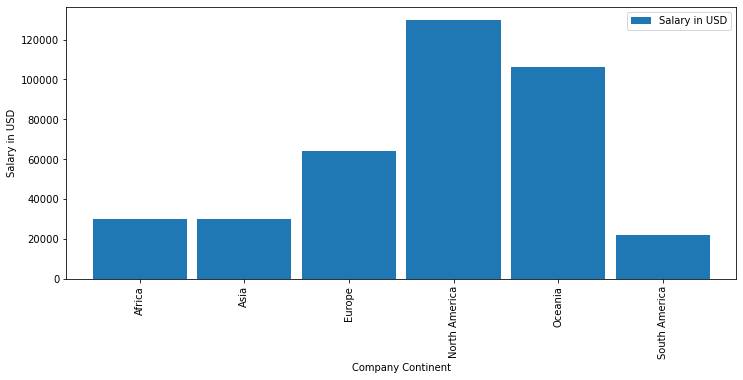

In [16]:
#Bargraph to represent Median salaries(USD) of Comapany continent.
plt.rcParams["figure.figsize"] = (12, 5)
median_salaries.plot(kind='bar',width = 0.9)
plt.legend()
plt.xlabel('Company Continent')
plt.ylabel('Salary in USD')

In [44]:
#Use the Lat and Lng as locations and Humidity as the weight.

# Store latitude and longitude in locations

continent_center={
    'Africa':[2.378056,16.063056],
    'Asia':[43.676944,87.331111],
    'Europe':[54.900000,25.316667],
    'Oceania':[-25.610000,134.354722],
    'North America':[48.166667,-100.166667],
    'South America':[-15.460833,-55.750000]
}

lat=[]
lng=[]
for continent in continent_center:
    lat.append(continent_center[continent][0])
    lng.append(continent_center[continent][1])

locations = pd.DataFrame({'Lat':lat,'Lng':lng}).astype(float)
weight_salaries =median_salaries['Salary in USD'].astype(float)

In [62]:
#Add Data Science company_continent to map
figure_layout = {
    'width': '600px',
    'height': '450px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

# Create heat layer
com_cont = gmaps.heatmap_layer(locations, weights=weight_salaries, 
                                 dissipating=False, max_intensity=65000,opacity=0.6,
                                 point_radius = 30)

# Add layer
fig.add_layer(com_cont)

# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='450px', margin='0 auto 0 auto', padding='1px', wi…